In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
from PIL import Image
import numpy as np
import os

from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
path='data/train_valid_data'
#path='/home/paperspace/fastai/courses/dl1/data_dog_cat/dogscats'

In [4]:
!ls {path} 

models	tmp  train  train_dir_list  valid  valid_dir_list


In [6]:
??ImageClassifierData.from_csv

In [11]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.backends.cudnn.enabled

True

In [9]:
??ImageClassifierData.from_csv

In [7]:
arch=resnet34
sz=300
data = ImageClassifierData.from_csv(path,folder=f'train',csv_fname=f'{path}new_train.csv', tfms=tfms_from_model(arch, sz))

In [8]:
type(data)

fastai.dataset.ImageClassifierData

In [7]:
os.listdir(f'{path}/train')

['boston_bull',
 'maltese_dog',
 'leonberg',
 'miniature_schnauzer',
 'walker_hound',
 'brabancon_griffon',
 'scottish_deerhound',
 'irish_terrier',
 'silky_terrier',
 'boxer',
 'samoyed',
 'german_short-haired_pointer',
 'dingo',
 'basset',
 'sealyham_terrier',
 'japanese_spaniel',
 'bluetick',
 'border_collie',
 'pekinese',
 'clumber',
 'dhole',
 'pembroke',
 'english_springer',
 'collie',
 'siberian_husky',
 'cardigan',
 'papillon',
 'african_hunting_dog',
 'australian_terrier',
 'entlebucher',
 'soft-coated_wheaten_terrier',
 'komondor',
 'tibetan_terrier',
 'chow',
 'lakeland_terrier',
 'irish_water_spaniel',
 'kuvasz',
 'bernese_mountain_dog',
 'newfoundland',
 'shih-tzu',
 'giant_schnauzer',
 'otterhound',
 'doberman',
 'miniature_poodle',
 'weimaraner',
 'standard_poodle',
 'gordon_setter',
 'welsh_springer_spaniel',
 'old_english_sheepdog',
 'scotch_terrier',
 'malinois',
 'saluki',
 'irish_setter',
 'chesapeake_bay_retriever',
 'german_shepherd',
 'kerry_blue_terrier',
 'kees

In [31]:
files=!ls {path}/train/affenpinscher
files[0]
print(len(files))

71


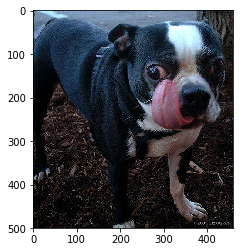

In [28]:
img=plt.imread(f'{path}/train/boston_bull/{files[2]}')
plt.imshow(img)

In [10]:
img.shape

(306, 500, 3)

In [8]:
??tfms_from_model

In [33]:
#arch=resnet34
#arch=resnet50
#sz=300
#tfms = tfms_from_model(resnet50, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#data = ImageClassifierData.from_paths(path, tfms=tfms)
#learn = ConvLearner.pretrained(arch, data, precompute=True)
#learn.fit(0.1, 3)
learn.fit(0.01, 1000, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1000), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.819144   1.096322   0.556     
    1      0.80911    1.128854   0.57                        
    2      0.837318   1.00515    0.572                       
    3      0.822343   1.071446   0.582                       
    4      0.828355   1.075679   0.559                       
    5      0.811807   1.11147    0.555                       
    6      0.828908   1.068259   0.586                       
    7      0.82493    0.993456   0.595                       
    8      0.805465   1.116814   0.563                       
    9      0.826483   1.105033   0.588                       
    10     0.811292   1.071813   0.568                       
    11     0.80515    1.129368   0.589                       
    12     0.818588   1.090978   0.569                       
    13     0.809793   1.109991   0.571                       
    14     0.821826   1.055592   0.577                       
    15     0.791145   1.04

   131     0.753542   1.086763   0.578                       
   132     0.760884   1.046455   0.579                       
   133     0.766069   1.170643   0.559                       
   134     0.75989    1.060874   0.584                       
   135     0.754014   1.09907    0.575                       
   136     0.765204   1.063793   0.572                       
   137     0.772997   1.124707   0.567                       
   138     0.767227   1.079447   0.56                        
   139     0.760528   1.099043   0.573                       
   140     0.755411   1.111529   0.561                       
   141     0.74982    1.166197   0.585                       
   142     0.764457   1.124021   0.563                       
   143     0.757966   1.077584   0.562                       
   144     0.759159   1.085668   0.56                        
   145     0.74781    1.132362   0.56                        
   146     0.753991   1.052911   0.584                       
   147  

KeyboardInterrupt: 

In [28]:
data.trn_ds[100][0].shape

(3, 300, 300)

In [35]:
??learn.fit

In [34]:
learn.save('18_05_14_40_pm')

In [15]:
??learn.predict

In [29]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 82%|████████▏ | 199/242 [00:03<00:00, 50.00it/s, loss=5.34]


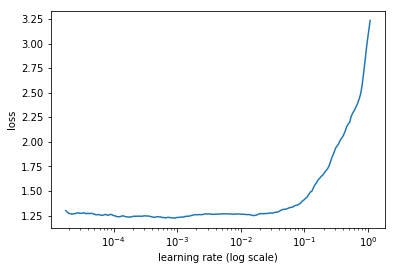

In [30]:
learn.sched.plot()

In [23]:
data.trn_y[:1000]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
 

In [24]:
!head -n 10 {path}new_labels.csv

id.jpg,breed
000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
001cdf01b096e06d78e9e5112d419397.jpg,pekinese
00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever
002211c81b498ef88e1b40b9abf84e1d.jpg,bedlington_terrier
00290d3e1fdd27226ba27a8ce248ce85.jpg,bedlington_terrier
002a283a315af96eaea0e28e7163b21b.jpg,borzoi
003df8b8a8b05244b1d920bb6cf451f9.jpg,basenji


In [6]:
labels=pd.read_csv(f'{path}new_labels.csv')

In [7]:
def read_img(img_id, train_or_test, size):
    """Read and resize image.
    # Arguments
        img_id: string
        train_or_test: string 'train' or 'test'.
        size: resize the original image.
    # Returns
        Image as numpy array.
    """
    pilimg = Image.open(f'{path}{train_or_test}/{img_id}')
    pilimg.thumbnail(size, Image.ANTIALIAS)
    arr = np.array(pilimg)
    
    #img = image.load_img(join(data_dir, train_or_test, '%s.jpg' % img_id), target_size=size)
    #img = image.img_to_array(img)
    return arr

In [15]:
files = os.listdir(f'{path}test')[:5]
files

['de084b830010b6107215fef5d4a75b94.jpg',
 '6b423ca7020e70eb05732843c5d2bad1.jpg',
 '74aa7e201e0e93e13e87b986a7d31839.jpg',
 'a079f72193264bc5685e5d28d7372680.jpg',
 '583f7580fa5fec1266331fcf83b76fd6.jpg']

In [17]:
read_img(files[0],'test',[200,100])

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ..., 
        [ 58,  27,  19],
        [ 61,  28,  20],
        [ 83,  45,  37]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ..., 
        [ 70,  27,  24],
        [ 78,  33,  30],
        [ 99,  48,  46]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ..., 
        [ 54,  26,  21],
        [ 61,  31,  26],
        [ 66,  32,  27]],

       ..., 
       [[ 77,  67,  45],
        [ 57, 100,  61],
        [ 51,  78,  47],
        ..., 
        [ 26,  16,  16],
        [ 25,  37,  50],
        [ 10,  15,  29]],

       [[ 71,  65,  40],
        [ 40,  80,  48],
        [ 10,  28,  10],
        ..., 
        [ 36,  31,  37],
        [ 48,  67,  91],
        [ 29,  31,  49]],

       [[ 50,  35,  22],
        [  0,  26,   8],
        [ 22,  30,  24],
        ..., 
        [ 21,  21,  32],
        [ 48,  72, 104],
        [ 85,  78,